#  Decision Tree Classifier using Scikit-learn
**Author:** Maitri Chauhan
**Dataset:** Iris Dataset  
**Tool:** Google Colab  
**Goal:** To build, visualize, and evaluate a Decision Tree Classifier using scikit-learn  
**Position:** Student in Computer Engineering


##  Installing Required Libraries
In this cell, we install necessary Python libraries such as `numpy`, `pandas`, `scikit-learn`, `matplotlib`, and `seaborn`. These will be used for data processing, visualization, and building the decision tree model.


In [2]:
!pip install numpy pandas scikit-learn matplotlib seaborn

##  Importing Libraries
We import all the essential libraries needed for working with data, building the model, and visualizing the decision tree.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

##  Loading the Iris Dataset
We load the built-in Iris dataset from `scikit-learn` and convert it into a Pandas DataFrame for easier manipulation and analysis.

In [4]:
# Load iris dataset
iris = load_iris()

# Create a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Show first 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


##  Splitting the Dataset
We split the dataset into training and testing sets using an 70-30 split. This allows us to train the model on one part of the data and test its accuracy on unseen data.

In [5]:
# Define input features and target
X = df.drop('target', axis=1)
y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##  Training the Decision Tree Model
We initialize and train a `DecisionTreeClassifier` from `scikit-learn` using the training data.

In [6]:
# Initialize and train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Visualizing the Decision Tree
We visualize the trained decision tree using `plot_tree`. The tree shows how decisions are made based on feature values at each node.

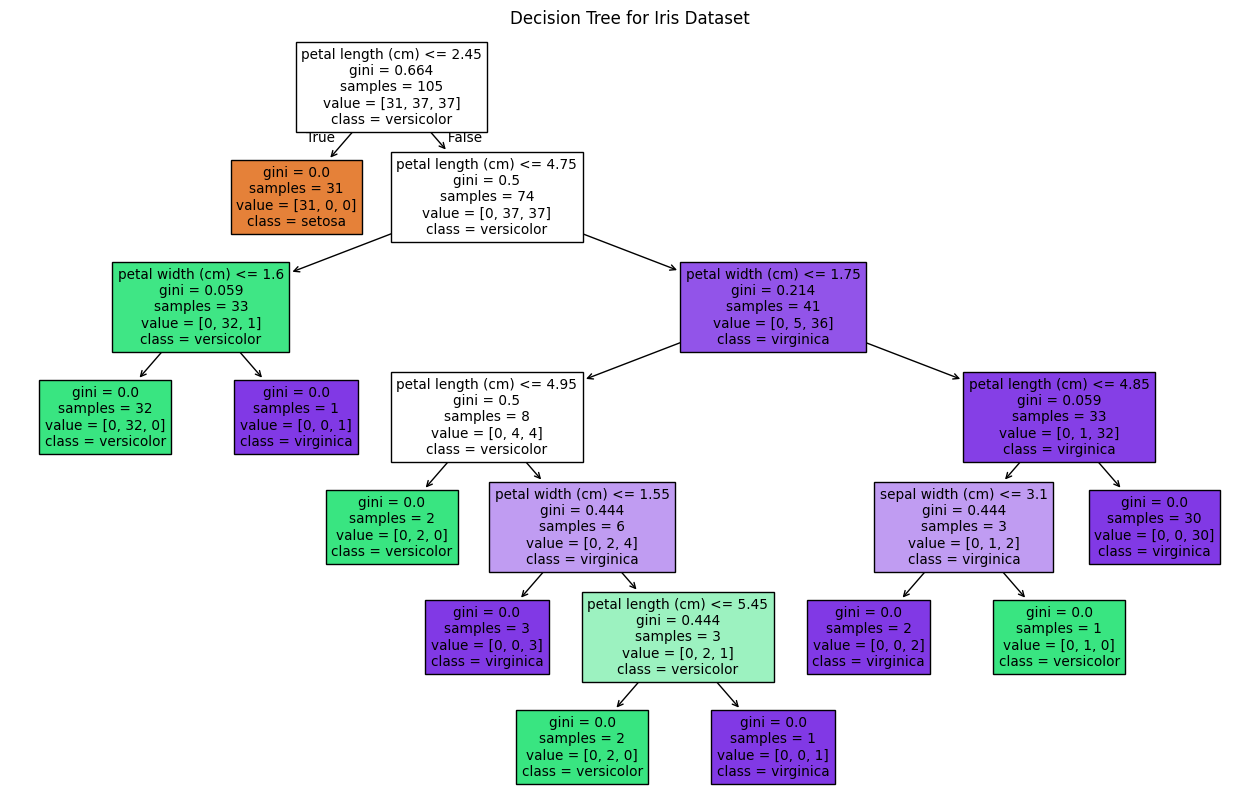

In [7]:
# Visualize the decision tree
plt.figure(figsize=(16, 10))
plot_tree(model,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True)
plt.title("Decision Tree for Iris Dataset")
plt.show()

##  Model Evaluation
We evaluate the model's performance using accuracy score and a classification report, which includes precision, recall, and F1-score for each class.

In [8]:
# Predict on test set
y_pred = model.predict(X_test)

# Accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



##  Optional: Tuning the Tree Depth
To avoid overfitting, we can limit the depth of the tree. This version uses a `max_depth=3` to simplify the tree and improve generalization.

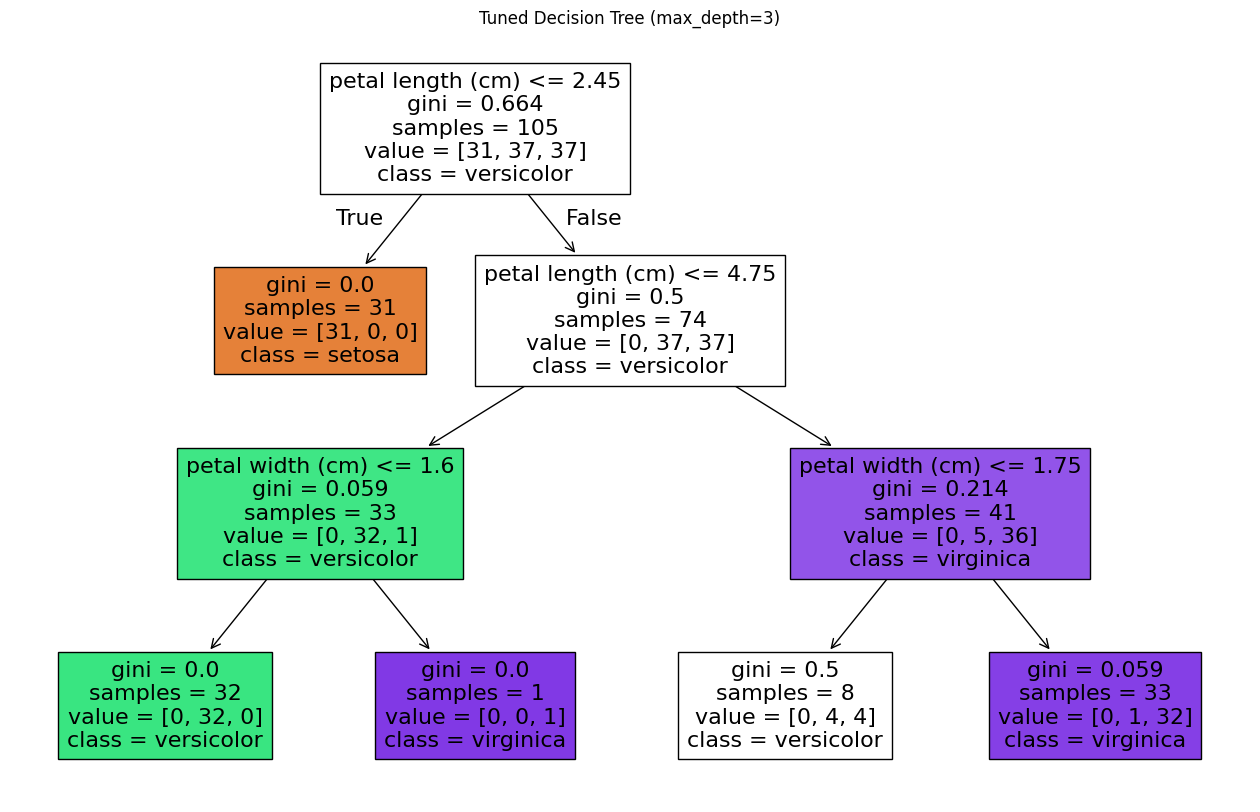

In [9]:
# Try limiting the depth of the tree
tuned_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tuned_model.fit(X_train, y_train)

# Visualize tuned tree
plt.figure(figsize=(16, 10))
plot_tree(tuned_model,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True)
plt.title("Tuned Decision Tree (max_depth=3)")
plt.show()